In [3]:
%load_ext lab_black

In [2]:
import pandas as pd
from src.enrichment_analysis import EnrichmentAnalysis

In [5]:
def extract(df, threshold=0.1, alpha=0.05):
    """Function to extract CpGs from report"""
    df = df[(df["Delta mean"].abs() > threshold) & (df["q-value"] <= alpha)]
    return set(df.index)

In [14]:
data = zip(
    (
        "../data/processed/CorrectedMyNorms/mynorm_PL.csv",
        "../data/processed/CorrectedMyNorms/mynorm_USA.csv",
        "../data/processed/CorrectedMyNorms/mynorm_Spain.csv",
    ),
    (
        "output/PLCoV_vs_HB_ALLProbes.csv",
        "output/USACoV_vs_HB_ALLProbes.csv",
        "output/SpainCoV_vs_HB_ALLProbes.csv",
    ),
    ("PL", "USA", "SPAIN"),
)

PL
Len:  4728


  0%|          | 0/2 [00:00<?, ?it/s]

,BG_UCSC_RefGene_Group,Input_UCSC_RefGene_Group,FC,p-value
Body,0.362558,0.304592,0.840118,0.193160
Unknown,0.233965,0.221346,0.946065,0.741503
TSS1500,0.127448,0.154925,1.215589,0.498872
5'UTR,0.113418,0.125482,1.106372,0.601018
TSS200,0.082855,0.103049,1.243732,0.533972
1stExon,0.047993,0.062390,1.299992,0.574300
3'UTR,0.024212,0.023309,0.962681,0.784045
ExonBnd,0.007551,0.004907,0.649858,0.383062


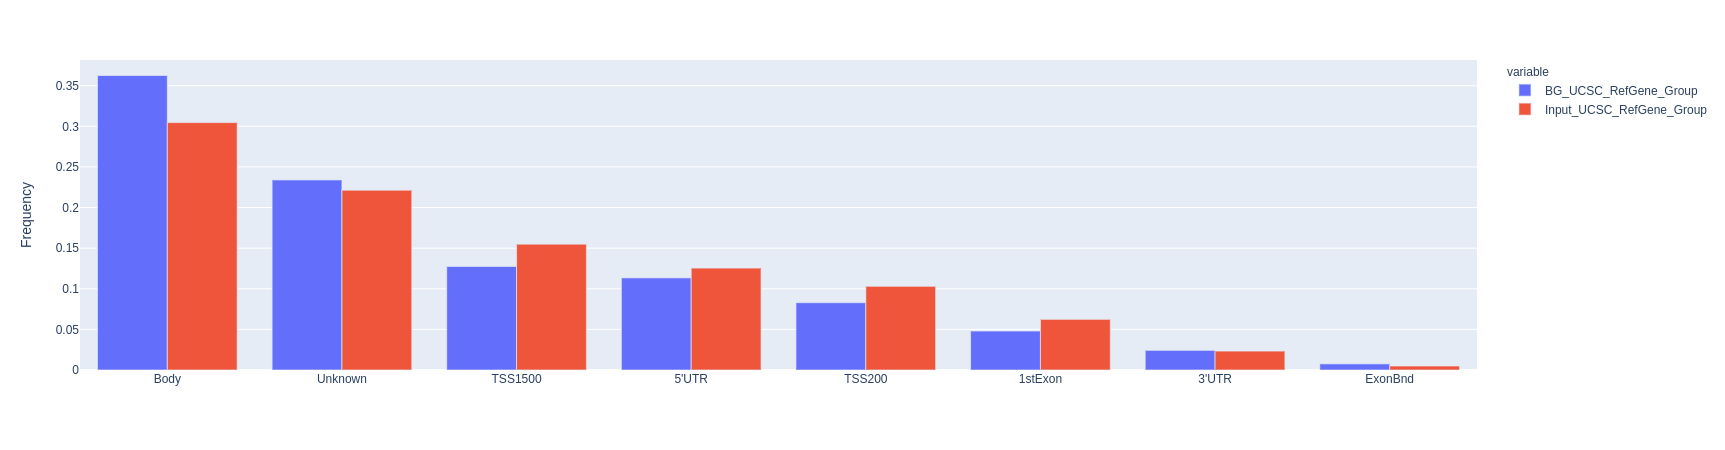

,BG_Relation_to_UCSC_CpG_Island,Input_Relation_to_UCSC_CpG_Island,FC,p-value
OpenSea,0.555822,0.504865,0.908320,0.261238
Island,0.193072,0.264382,1.369344,0.089958
N_Shore,0.098543,0.087986,0.892876,0.774399
S_Shore,0.084012,0.076777,0.913881,0.885016
N_Shelf,0.035552,0.032995,0.928080,0.764313
S_Shelf,0.032999,0.032995,0.999873,0.866668


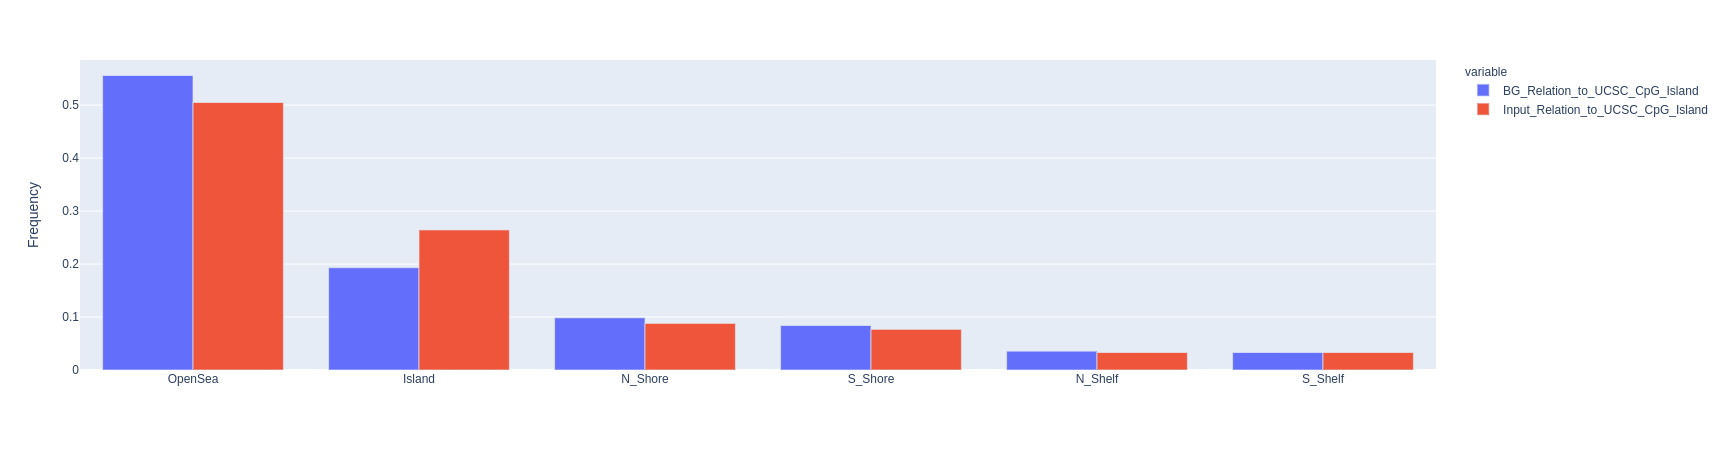

100%|██████████| 2/2 [00:00<00:00, 27.57it/s]


####################################################################################################
USA
Len:  139


  0%|          | 0/2 [00:00<?, ?it/s]

,BG_UCSC_RefGene_Group,Input_UCSC_RefGene_Group,FC,p-value
Body,0.362855,0.415094,1.143968,0.234641
Unknown,0.233810,0.270440,1.156669,0.392521
TSS1500,0.127447,0.106918,0.838923,0.600841
5'UTR,0.113421,0.100629,0.887216,0.672125
TSS200,0.082742,0.037736,0.456066,0.120786
1stExon,0.047942,0.044025,0.918301,0.710088
3'UTR,0.024222,0.006289,0.259649,0.354915
ExonBnd,0.007561,0.018868,2.495346,0.151027


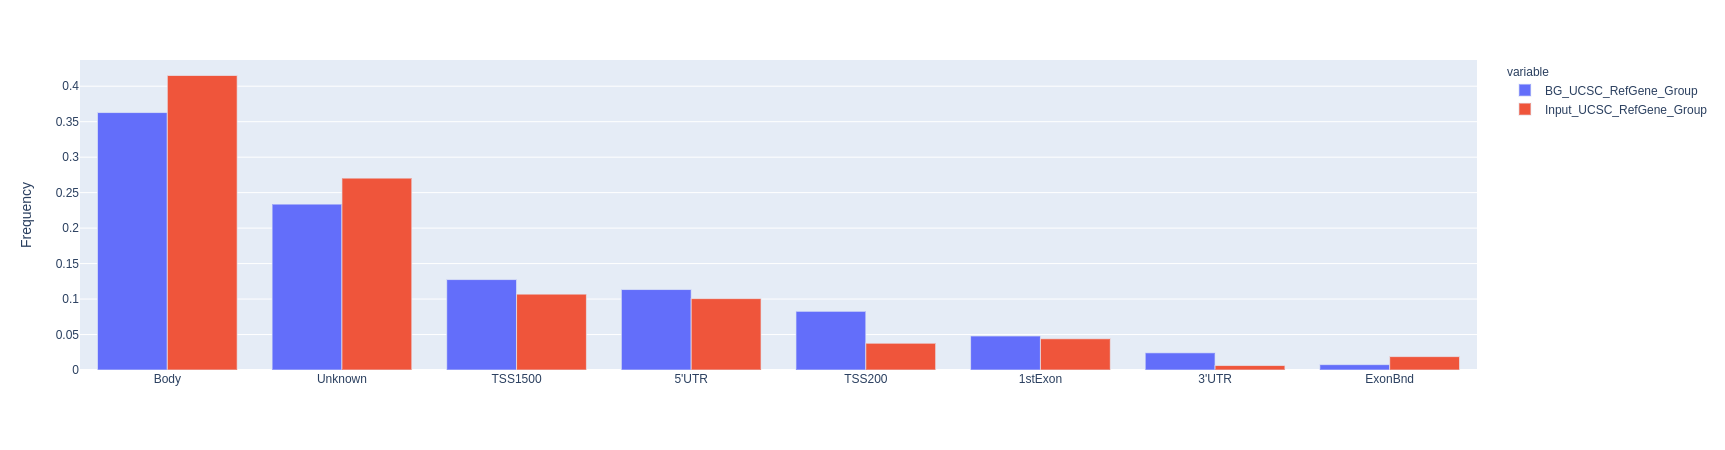

,BG_Relation_to_UCSC_CpG_Island,Input_Relation_to_UCSC_CpG_Island,FC,p-value
OpenSea,0.556293,0.654676,1.176856,0.059276
Island,0.192802,0.151079,0.783598,0.277936
N_Shore,0.098460,0.079137,0.803742,0.535516
S_Shore,0.083951,0.043165,0.514176,0.112995
N_Shelf,0.035531,0.028777,0.809911,0.765105
S_Shelf,0.032963,0.043165,1.309498,0.693493


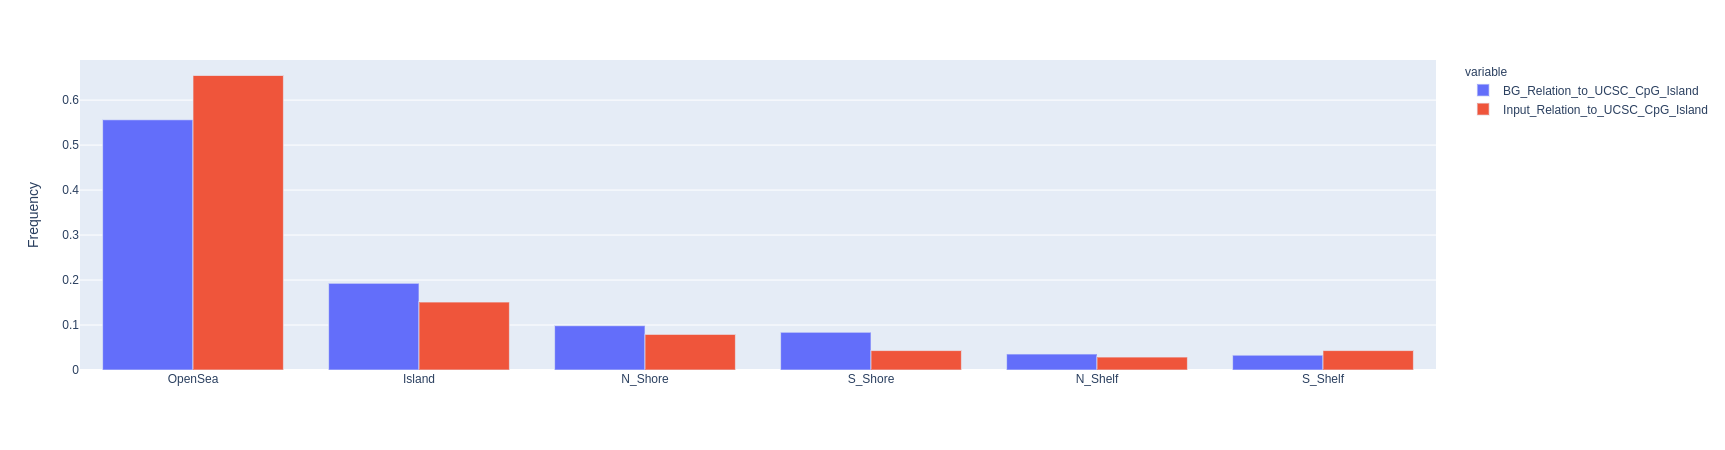

100%|██████████| 2/2 [00:00<00:00, 27.08it/s]


####################################################################################################
SPAIN
Len:  1251


  0%|          | 0/2 [00:00<?, ?it/s]

,BG_UCSC_RefGene_Group,Input_UCSC_RefGene_Group,FC,p-value
Body,0.366385,0.302578,0.825848,0.168265
Unknown,0.237241,0.278155,1.172458,0.314812
TSS1500,0.126835,0.122795,0.968151,0.837278
5'UTR,0.112111,0.112619,1.004525,0.946643
TSS200,0.079125,0.083446,1.054616,0.974138
1stExon,0.046049,0.062415,1.355408,0.505649
3'UTR,0.024528,0.029172,1.189337,0.723532
ExonBnd,0.007726,0.008820,1.141486,0.795121


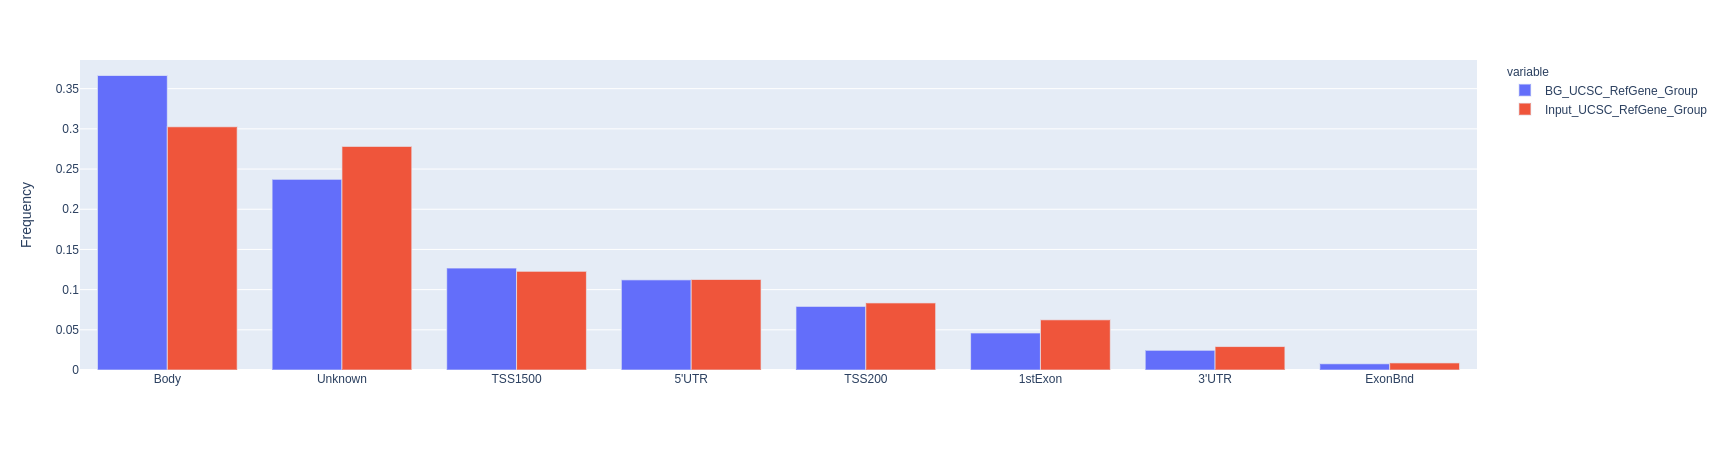

,BG_Relation_to_UCSC_CpG_Island,Input_Relation_to_UCSC_CpG_Island,FC,p-value
OpenSea,0.564281,0.525180,0.930706,0.489338
Island,0.183621,0.231815,1.262465,0.230958
N_Shore,0.098659,0.084732,0.858841,0.531508
S_Shore,0.084196,0.073541,0.873452,0.609187
N_Shelf,0.035899,0.038369,1.068807,0.825538
S_Shelf,0.033344,0.046363,1.390433,0.353551


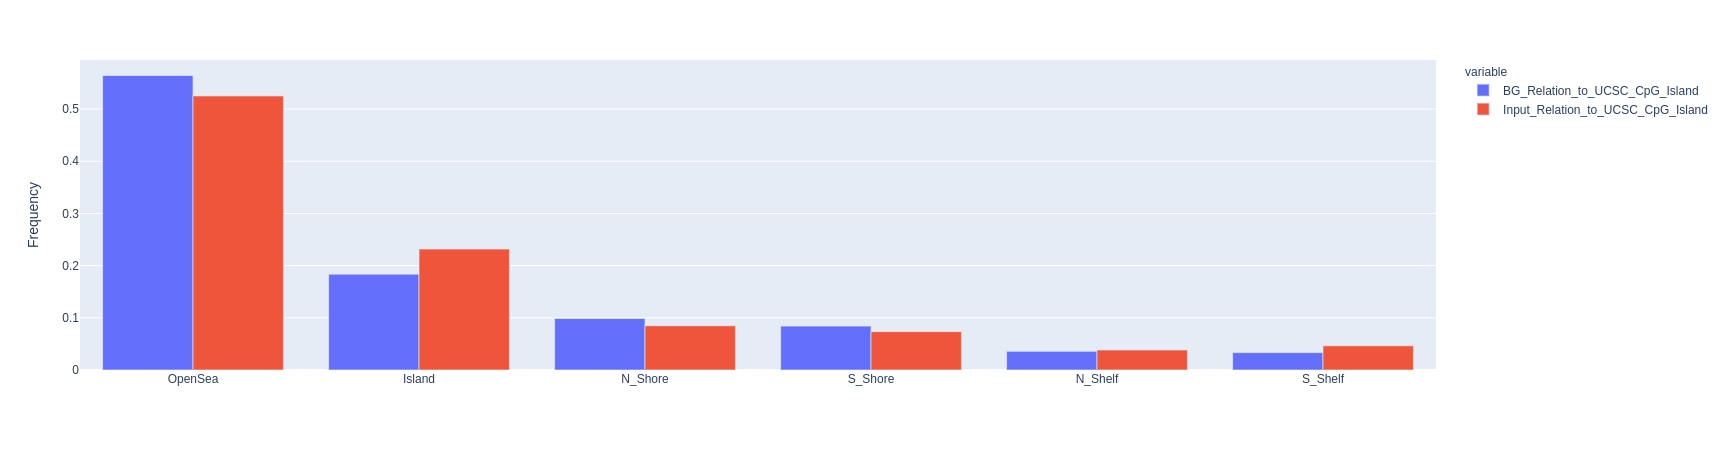

100%|██████████| 2/2 [00:00<00:00, 26.68it/s]

####################################################################################################


In [16]:
for bg, report, name in data:
    print(name)
    bg = pd.read_csv(bg, index_col=0)
    report = pd.read_csv(report, index_col=0)
    report = extract(report)
    print("Len: ", len(report))

    ea = EnrichmentAnalysis(
        mynorm=bg,
        report=report,
        manifest_path="../data/Additional/EPIC/MethylationEPIC_v-1-0_B4.csv",
    )
    ea.prepare_bg()
    ea.calculate_frequency()
    ea.estimate_fc()
    ea.vis()

    print("#" * 100)